In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns 
import pickle
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler    
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  

In [2]:
data = pd.read_csv("C:/Users/pc230/Downloads/marketing_campaign (1).csv",sep="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data["ID"] = data["ID"].astype(object)

In [6]:
data.shape

(2240, 29)

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
data = data.dropna(subset=["Income"])
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
data.duplicated("ID").sum()

0

In [10]:
data["Age"] = 2023 - data["Year_Birth"]
data["Amount_Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Status"]=data["Marital_Status"].replace({"Married":"With Partner", "Together":"With Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data["Household_Size"] = data["Status"].replace({"Alone": 1, "With Partner":2})+ data["Kidhome"] + data["Teenhome"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Education"] = data["Education"].replace({"Graduation":"Bachelor's","PhD":"Master's/PhD","Master Education":"Master's/PhD","2n Cycle":"Basic","Basic":"Basic"})

to_drop = ["ID","Year_Birth","Marital_Status","Dt_Customer", "Z_CostContact", "Z_Revenue"]
data = data.drop(to_drop, axis=1)

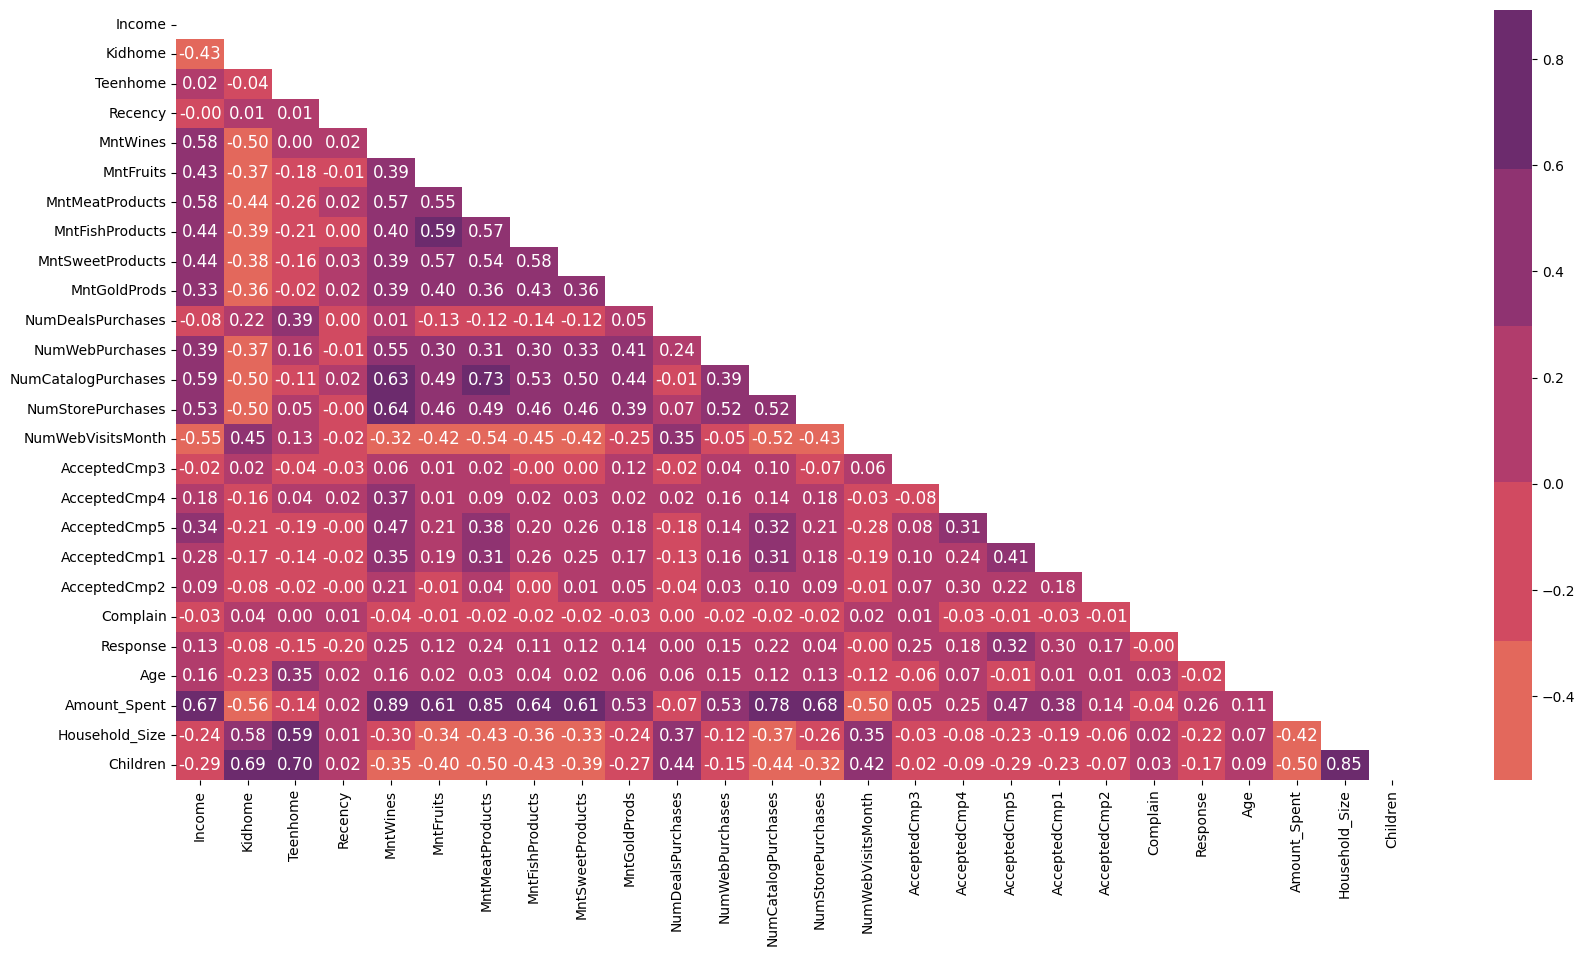

In [11]:
numeric_data = data.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
cmap = sns.color_palette("flare")
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, mask=mask, cmap=cmap, annot=True, fmt=".2f", center=0,annot_kws={"size": 12},linewidths=0, linecolor="white")
plt.show()

C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3798819513.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[kol], ax=axs[i, 0], palette=[palette[i]])
C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3798819513.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[kol], ax=axs[i, 0], palette=[palette[i]])


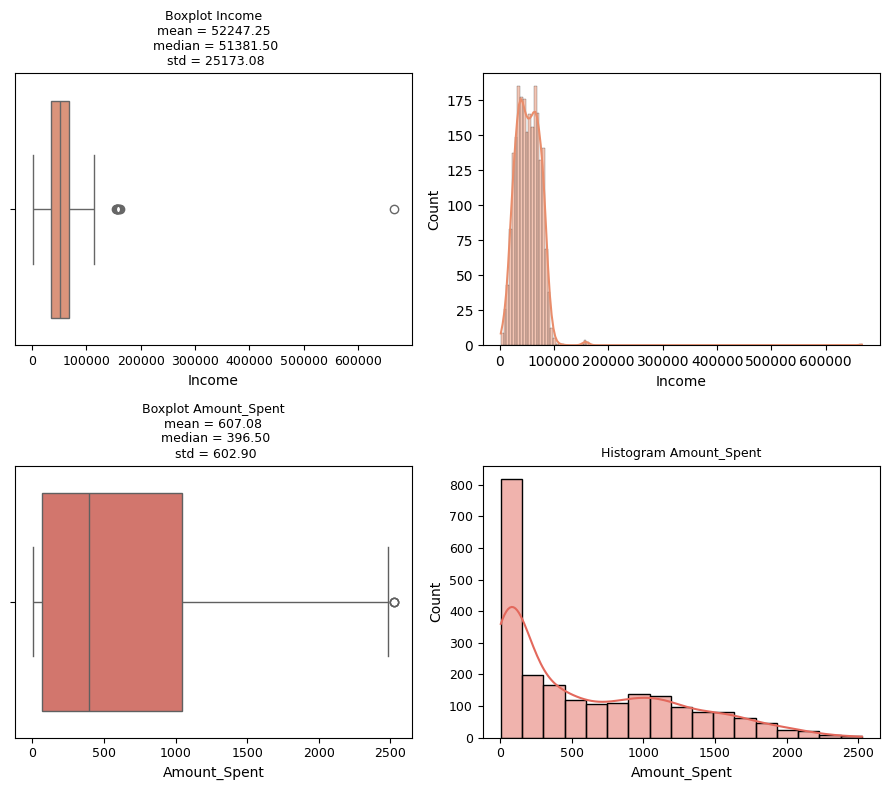

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(9, 8))
palette = sns.color_palette("flare")
kolom_numerik = ["Income", "Amount_Spent"]

for i, kol in enumerate(kolom_numerik):
    # Boxplot
    sns.boxplot(x=data[kol], ax=axs[i, 0], palette=[palette[i]])
    axs[i, 0].set_title(f"Boxplot {kol}\nmean = {data[kol].mean():.2f}\n median = {data[kol].median():.2f}\n std = {data[kol].std():.2f}", fontsize=9)
    axs[i, 0].tick_params(axis="x", labelsize=9)
    axs[i, 0].tick_params(axis="y", labelsize=9)

    # Histogram
    sns.histplot(data[kol], ax=axs[i, 1], kde=True, color=palette[i])
    axs[1, i].set_title(f"Histogram {kol}", fontsize=9)
    axs[1, i].tick_params(axis="x", labelsize=9)
    axs[1, i].tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

In [13]:
Q1 = data[kolom_numerik].quantile(0.25)
Q3 = data[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_baru = data[kolom_numerik].apply(lambda x: x[(x >= lower_bound[x.name]) & (x <= upper_bound[x.name])])
data[data_baru.columns] = data_baru

In [14]:
data_baru = data.dropna(subset=['Income','Amount_Spent'])

C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\141636253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_baru[kol], ax=axs[i, 0], palette=[palette[i]])
C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\141636253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_baru[kol], ax=axs[i, 0], palette=[palette[i]])


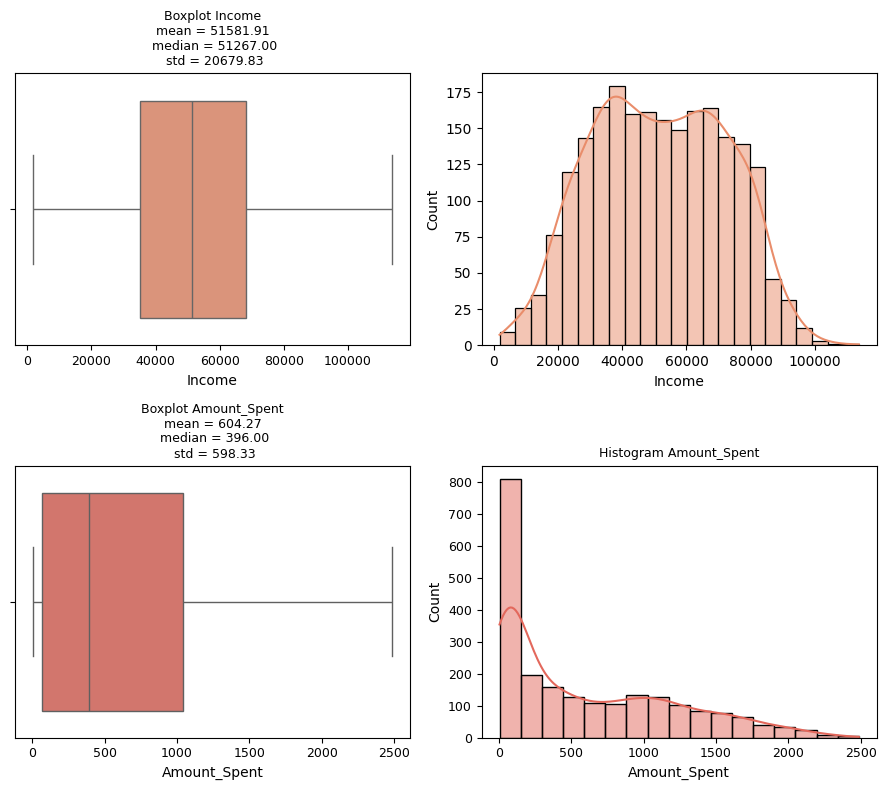

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(9, 8))
palette = sns.color_palette("flare")

kolom_numerik = ["Income", "Amount_Spent"]

for i, kol in enumerate(kolom_numerik):
    # Boxplot
    sns.boxplot(x=data_baru[kol], ax=axs[i, 0], palette=[palette[i]])
    axs[i, 0].set_title(f"Boxplot {kol}\nmean = {data_baru[kol].mean():.2f}\n median = {data_baru[kol].median():.2f}\n std = {data_baru[kol].std():.2f}", fontsize=9)
    axs[i, 0].tick_params(axis="x", labelsize=9)
    axs[i, 0].tick_params(axis="y", labelsize=9)

    # Histogram
    sns.histplot(data_baru[kol], ax=axs[i, 1], kde=True, color=palette[i])
    axs[1, i].set_title(f"Histogram {kol}", fontsize=9)
    axs[1, i].tick_params(axis="x", labelsize=9)
    axs[1, i].tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3400238927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_baru, x=kol, ax=axs[i], palette=palette)
C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3400238927.py:6: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.violinplot(data=data_baru, x=kol, ax=axs[i], palette=palette)
C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3400238927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_baru, x=kol, ax=axs[i], palette=palette)
C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3400238927.py:6: UserWarning: The palette list has more values (6) than needed (1), which

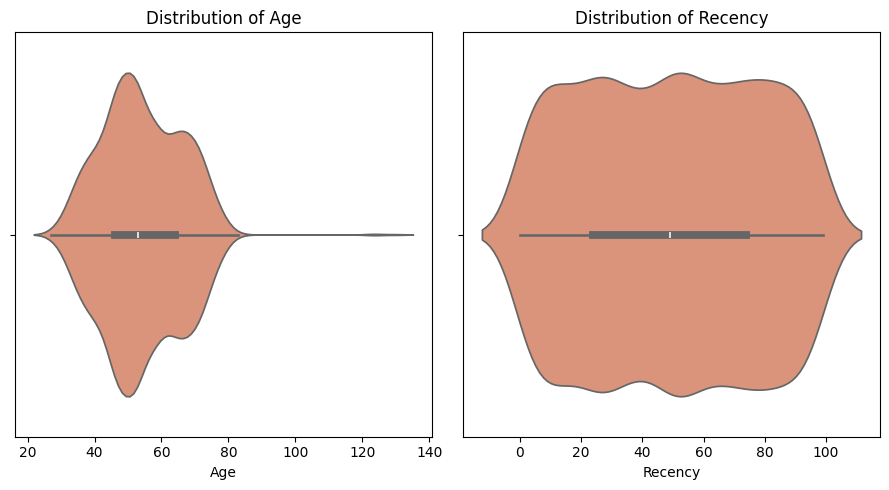

In [16]:
masa = ["Age", "Recency"]
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
palette = sns.color_palette("flare")

for i, kol in enumerate(masa):
    sns.violinplot(data=data_baru, x=kol, ax=axs[i], palette=palette)
    axs[i].set_xlabel(kol)
    axs[i].set_title(f"Distribution of {kol}")

plt.tight_layout()
plt.show()

In [17]:
#STANDARISASI KOLOM NUMERIK
data_numerik = data_baru.drop(["Education","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response","Status"],axis=1)
data_std = StandardScaler().fit_transform(data_numerik) 
data_std = pd.DataFrame(data=data_std, index=data_numerik.index, columns=data_numerik.columns)

In [18]:
data_kategorikal = data_baru[["Education","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response","Status"]]
data_kategorikal.head()

,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Status
0,Bachelor's,0,0,0,0,0,0,1,Alone
1,Bachelor's,0,0,0,0,0,0,0,Alone
2,Bachelor's,0,0,0,0,0,0,0,With Partner
3,Bachelor's,0,0,0,0,0,0,0,With Partner
4,Master's/PhD,0,0,0,0,0,0,0,With Partner


In [19]:
for col in data_kategorikal.columns:
    data_kategorikal.loc[:, col] = LabelEncoder().fit_transform(data_kategorikal[col])

print(data_kategorikal.head())

  Education  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0         0             0             0             0             0   
1         0             0             0             0             0   
2         0             0             0             0             0   
3         0             0             0             0             0   
4         3             0             0             0             0   

   AcceptedCmp5  Complain  Response Status  
0             0         0         1      0  
1             0         0         0      0  
2             0         0         0      1  
3             0         0         0      1  
4             0         0         0      1  


In [20]:
data_model = data_std.merge(data_kategorikal,left_index=True,right_index=True,how="left")
data_model.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Children,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Status
0,0.317100,-0.824175,-0.931610,0.310035,0.982202,1.556923,1.764056,2.451196,1.492256,0.847249,...,-1.268722,0,0,0,0,0,0,0,1,0
1,-0.253344,1.037819,0.905778,-0.380951,-0.874479,-0.637858,-0.732075,-0.651139,-0.634700,-0.734193,...,1.403228,0,0,0,0,0,0,0,0,0
2,0.968849,-0.824175,-0.931610,-0.795542,0.360333,0.573056,-0.172757,1.338006,-0.145744,-0.039901,...,-1.268722,0,0,0,0,0,0,0,0,1
3,-1.206082,1.037819,-0.931610,-0.795542,-0.874479,-0.562175,-0.667360,-0.505146,-0.585804,-0.753479,...,0.067253,0,0,0,0,0,0,0,0,1
4,0.324597,1.037819,-0.931610,1.553809,-0.392456,0.421692,-0.214359,0.151819,0.000942,-0.560620,...,0.067253,3,0,0,0,0,0,0,0,1


In [21]:
#MENCARI JUMLAH CLUSTER YANG OPTIMAL
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(data_model, categorical=[19,20,21,22,23,24,25,26,27])  
    cost[k]= kproto.cost_  

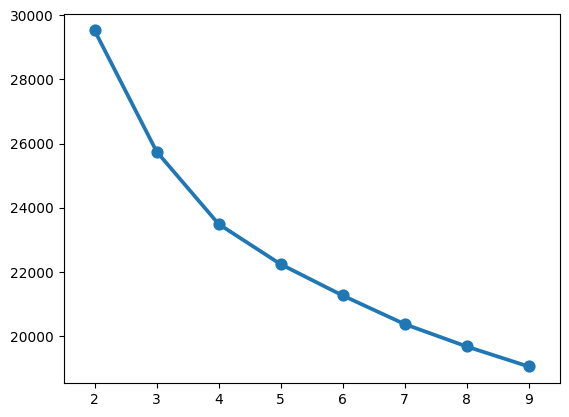

In [22]:
sns.color_palette("flare")
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

In [23]:
kproto = KPrototypes(n_clusters = 4, random_state = 75)  
kproto = kproto.fit(data_model, categorical=[19,20,21,22,23,24,25,26,27])  
pickle.dump(kproto, open("cluster.pkl", "wb"))  

In [24]:
clusters =  kproto.predict(data_model, categorical=[19,20,21,22,23,24,25,26,27])    
print("segmen : {}\n".format(clusters))    
    
data_final = data_baru.copy()    
data_final["cluster"] = clusters
print(data_final.head())   

segmen : [3 0 3 ... 3 2 0]

      Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0    Bachelor's  58138.0        0         0       58       635         88   
1    Bachelor's  46344.0        1         1       38        11          1   
2    Bachelor's  71613.0        0         0       26       426         49   
3    Bachelor's  26646.0        1         0       26        11          4   
4  Master's/PhD  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp2  Complain  Response  Age  Amount_Spe

C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3553740570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data_final["cluster"], palette= palette)
C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\3553740570.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  pl = sns.countplot(x=data_final["cluster"], palette= palette)


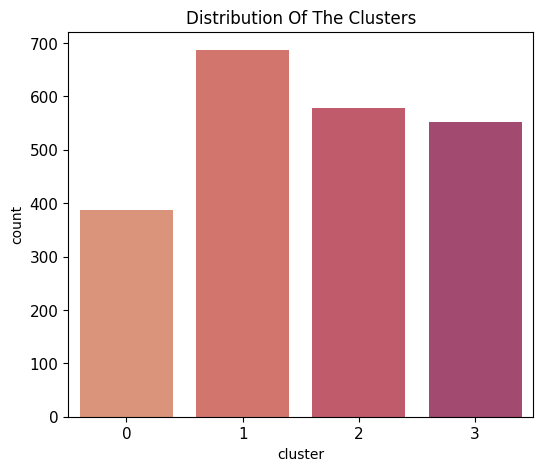

In [25]:
plt.figure(figsize=(6,5))
palette = sns.color_palette("flare")
pl = sns.countplot(x=data_final["cluster"], palette= palette)
pl.set_title("Distribution Of The Clusters")
pl.tick_params(axis="x", labelsize=11)
pl.tick_params(axis="y", labelsize=11)
plt.show()

C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\1548320698.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = data_final,x=data_final["Amount_Spent"], y=data_final["Income"],hue=data_final["cluster"], palette= palette)


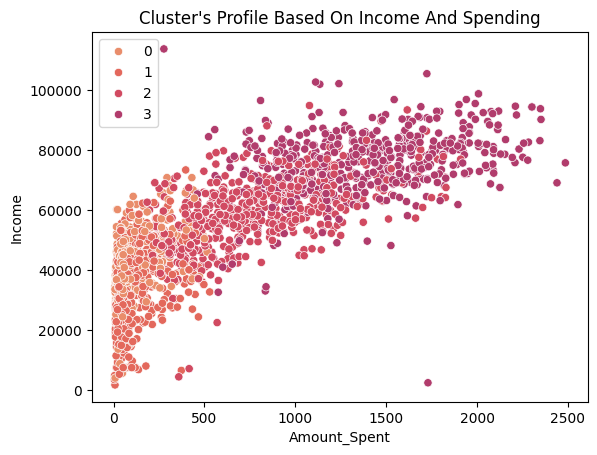

In [26]:
palette = sns.color_palette("flare")
pl = sns.scatterplot(data = data_final,x=data_final["Amount_Spent"], y=data_final["Income"],hue=data_final["cluster"], palette= palette)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\2215925655.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = data_final,x=data_final["Age"], y=data_final["Income"],hue=data_final["cluster"], palette= palette)


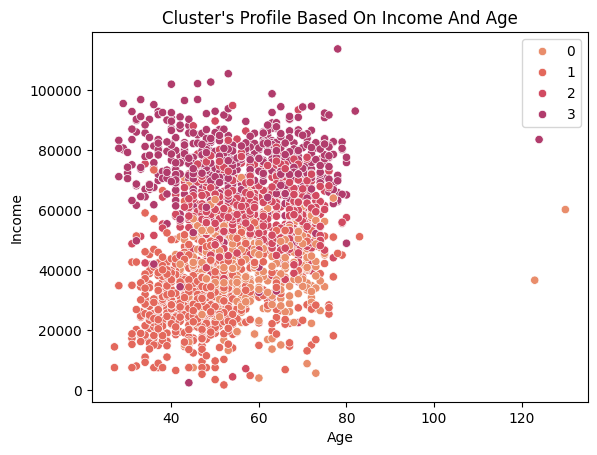

In [27]:
palette = sns.color_palette("flare")
pl = sns.scatterplot(data = data_final,x=data_final["Age"], y=data_final["Income"],hue=data_final["cluster"], palette= palette)
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend()
plt.show()

C:\Users\pc230\AppData\Local\Temp\ipykernel_1108\1566156774.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = data_final,x=data_final["Age"], y=data_final["Amount_Spent"],hue=data_final["cluster"], palette= palette)


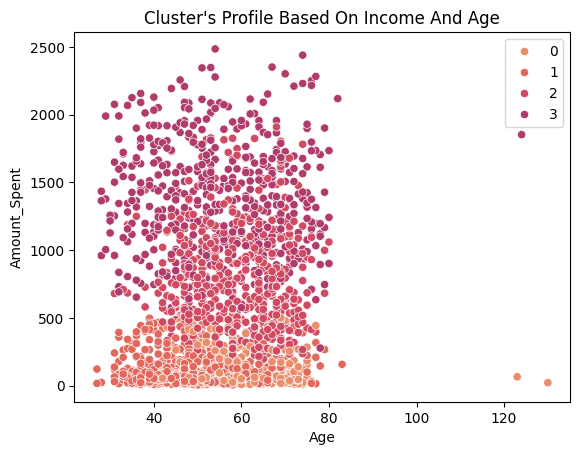

In [28]:
palette = sns.color_palette("flare")
pl = sns.scatterplot(data = data_final,x=data_final["Age"], y=data_final["Amount_Spent"],hue=data_final["cluster"], palette= palette)
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend()
plt.show()

In [29]:
cluster_0 = data_final[data_final["cluster"]==0]
cluster_0.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Amount_Spent,Household_Size,Children,cluster
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.0
mean,40933.462532,1.087855,1.012920,49.780362,67.904393,3.736434,26.870801,5.113695,3.441860,15.581395,...,0.0,0.005168,0.005168,0.018088,0.098191,58.064599,122.648579,3.749354,2.100775,0.0
std,11530.085344,0.356338,0.300843,28.575340,81.094352,7.432096,29.540590,8.744354,5.859637,20.073969,...,0.0,0.071795,0.071795,0.133442,0.297958,10.201263,120.373256,0.581866,0.349203,0.0
min,4023.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,38.000000,8.000000,2.000000,1.000000,0.0
25%,34221.500000,1.000000,1.000000,26.000000,15.000000,0.000000,8.000000,0.000000,0.000000,3.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,51.000000,41.000000,3.000000,2.000000,0.0
50%,40800.000000,1.000000,1.000000,50.000000,31.000000,1.000000,16.000000,2.000000,1.000000,8.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,57.000000,68.000000,4.000000,2.000000,0.0
75%,48710.000000,1.000000,1.000000,75.000000,86.000000,4.000000,34.000000,7.000000,4.000000,21.500000,...,0.0,0.000000,0.000000,0.000000,0.000000,65.000000,174.000000,4.000000,2.000000,0.0
max,70844.000000,2.000000,2.000000,99.000000,456.000000,70.000000,196.000000,72.000000,67.000000,176.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,130.000000,515.000000,5.000000,3.000000,0.0


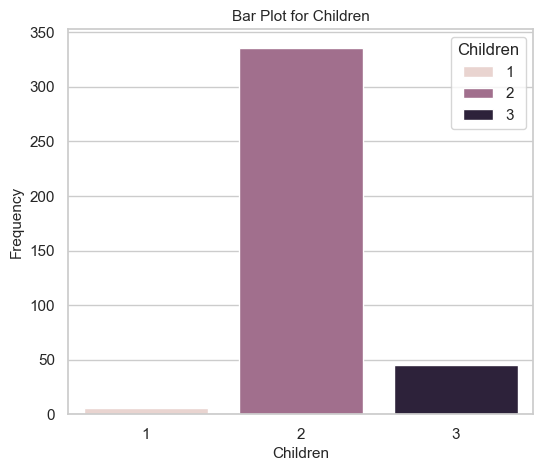

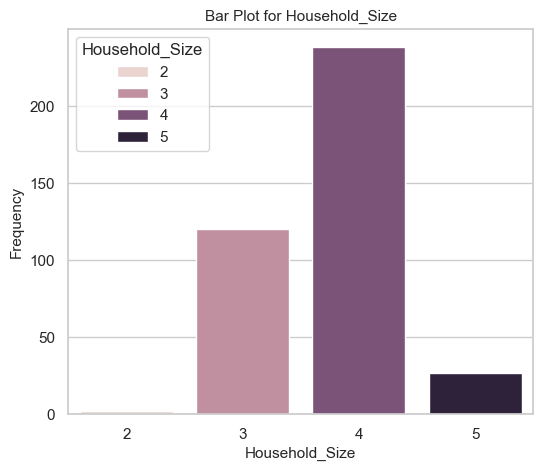

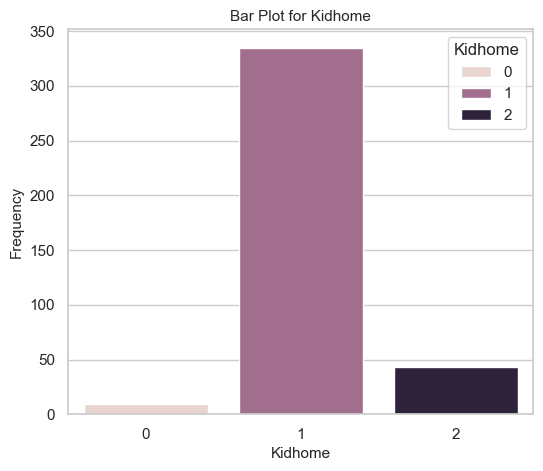

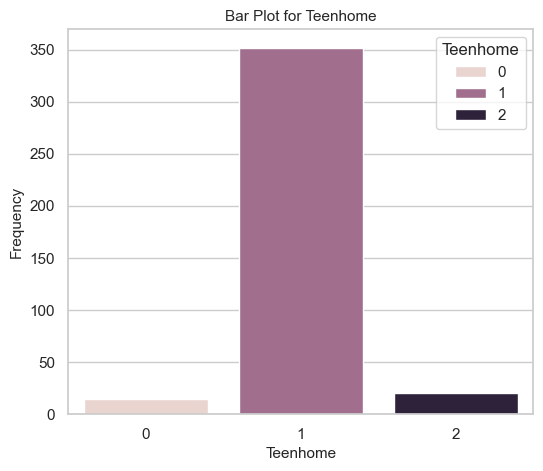

In [30]:
var = ["Children", "Household_Size", "Kidhome", "Teenhome"]
sns.set(style="whitegrid")
sns.set_palette("flare")

for var in var:
    plt.figure(figsize=(6, 5))
    sns.barplot(x=var, y="count", hue=var, data=cluster_0[var].value_counts().reset_index())
    plt.xlabel(var, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.tick_params(axis="x", labelsize=11)
    plt.tick_params(axis="y", labelsize=11)
    plt.title(f"Bar Plot for {var}", fontsize=11)
    plt.show()

In [31]:
cluster_1 = data_final[data_final["cluster"]==1]
cluster_1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Amount_Spent,Household_Size,Children,cluster
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,...,687.0,687.000000,687.0,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.0
mean,31802.077147,0.650655,0.148472,49.010189,39.861718,6.567686,26.799127,10.219796,6.806405,17.836972,...,0.0,0.001456,0.0,0.008734,0.103348,47.838428,108.091703,2.445415,0.799127,1.0
std,11789.544868,0.480156,0.355826,29.023438,53.521090,9.690141,31.515563,17.940776,9.701767,23.931137,...,0.0,0.038152,0.0,0.093113,0.304635,10.303631,105.428939,0.627019,0.404565,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,27.000000,5.000000,1.000000,0.000000,1.0
25%,23386.500000,0.000000,0.000000,24.000000,6.000000,1.000000,8.000000,2.000000,1.000000,5.000000,...,0.0,0.000000,0.0,0.000000,0.000000,40.000000,39.000000,2.000000,1.000000,1.0
50%,31163.000000,1.000000,0.000000,49.000000,17.000000,3.000000,15.000000,4.000000,3.000000,11.000000,...,0.0,0.000000,0.0,0.000000,0.000000,47.000000,67.000000,3.000000,1.000000,1.0
75%,39331.500000,1.000000,0.000000,75.000000,50.500000,8.000000,30.000000,12.000000,9.000000,21.000000,...,0.0,0.000000,0.0,0.000000,0.000000,53.000000,137.000000,3.000000,1.000000,1.0
max,73395.000000,2.000000,1.000000,99.000000,308.000000,87.000000,217.000000,179.000000,78.000000,262.000000,...,0.0,1.000000,0.0,1.000000,1.000000,83.000000,529.000000,3.000000,2.000000,1.0


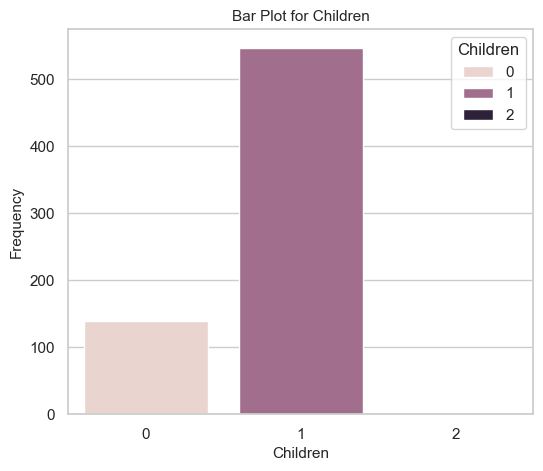

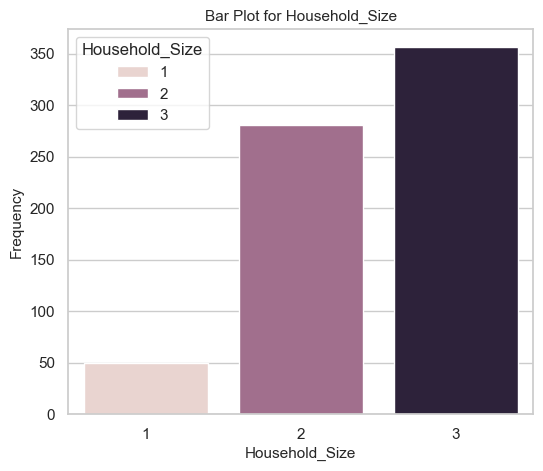

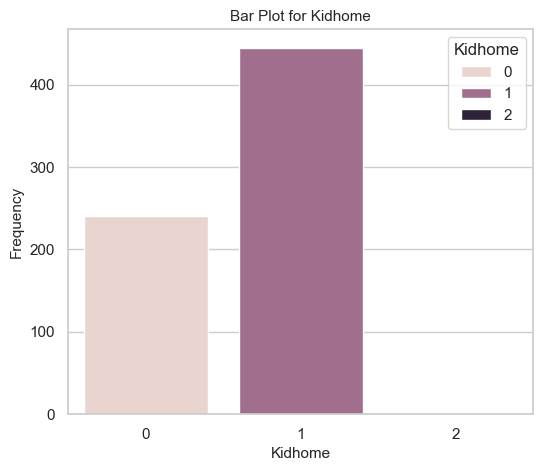

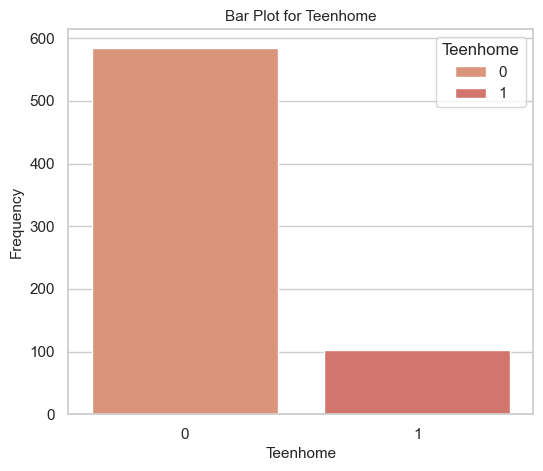

In [32]:
var = ["Children", "Household_Size", "Kidhome", "Teenhome"]
sns.set(style="whitegrid")
sns.set_palette("flare")

for var in var:
    plt.figure(figsize=(6, 5))
    sns.barplot(x=var, y="count", hue=var, data=cluster_1[var].value_counts().reset_index())
    plt.xlabel(var, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.tick_params(axis="x", labelsize=11)
    plt.tick_params(axis="y", labelsize=11)
    plt.title(f"Bar Plot for {var}", fontsize=11)
    plt.show()

In [33]:
cluster_2 = data_final[data_final["cluster"]==2]
cluster_2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Amount_Spent,Household_Size,Children,cluster
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.0
mean,59261.210708,0.157168,0.949914,48.290155,488.450777,23.851468,145.094991,31.518135,25.001727,61.889465,...,0.031088,0.041451,0.018998,0.008636,0.110535,58.587219,775.806563,2.791019,1.107081,2.0
std,10742.430061,0.373652,0.389187,28.605092,288.732127,27.796319,104.328631,36.720410,31.542441,54.705929,...,0.173706,0.199503,0.136637,0.092606,0.313827,9.637221,359.061600,0.665139,0.446751,0.0
min,4428.000000,0.000000,0.000000,0.000000,16.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,185.000000,1.000000,0.000000,2.0
25%,52605.500000,0.000000,1.000000,24.000000,268.500000,5.000000,69.000000,6.000000,4.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,493.000000,2.000000,1.000000,2.0
50%,59594.000000,0.000000,1.000000,48.000000,424.000000,14.000000,122.000000,19.000000,13.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,727.000000,3.000000,1.000000,2.0
75%,65781.000000,0.000000,1.000000,72.000000,646.000000,35.000000,193.500000,45.500000,33.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,1012.500000,3.000000,1.000000,2.0
max,94871.000000,2.000000,2.000000,99.000000,1459.000000,142.000000,650.000000,223.000000,195.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,1910.000000,5.000000,3.000000,2.0


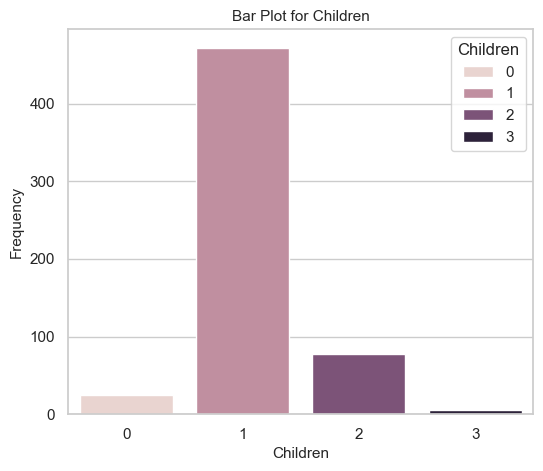

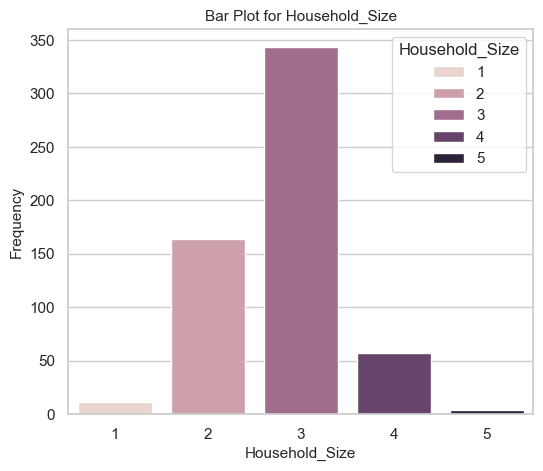

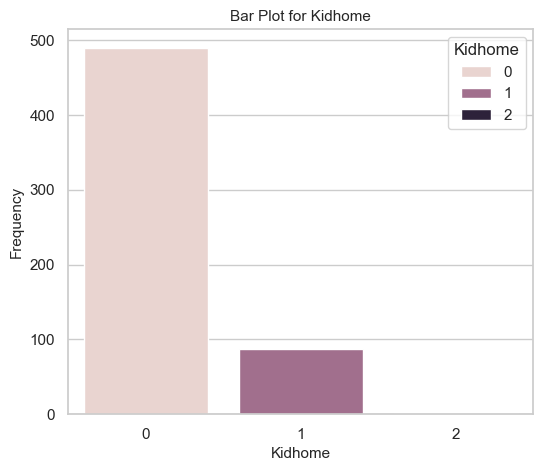

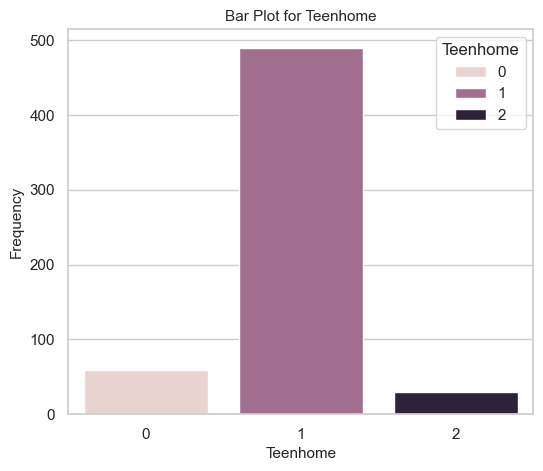

In [34]:
var = ["Children", "Household_Size", "Kidhome", "Teenhome"]
sns.set(style="whitegrid")
sns.set_palette("flare")

for var in var:
    plt.figure(figsize=(6, 5))
    sns.barplot(x=var, y="count", hue=var, data=cluster_2[var].value_counts().reset_index())
    plt.xlabel(var, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.tick_params(axis="x", labelsize=11)
    plt.tick_params(axis="y", labelsize=11)
    plt.title(f"Bar Plot for {var}", fontsize=11)
    plt.show()

In [35]:
cluster_3 = data_final[data_final["cluster"]==3]
cluster_3.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Amount_Spent,Household_Size,Children,cluster
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.0
mean,75609.782609,0.030797,0.134058,49.289855,608.375000,69.182971,452.215580,101.153986,70.590580,77.996377,...,0.255435,0.206522,0.030797,0.005435,0.286232,54.893116,1379.514493,1.764493,0.164855,3.0
std,10750.879117,0.172924,0.346305,29.536702,318.886895,51.286260,231.841337,66.230554,52.004842,60.906819,...,0.436501,0.405176,0.172924,0.073587,0.452409,13.761825,412.125533,0.625217,0.376241,0.0
min,2447.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,277.000000,1.000000,0.000000,3.0
25%,69959.750000,0.000000,0.000000,23.000000,364.750000,26.000000,268.500000,45.000000,29.750000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1063.500000,1.000000,0.000000,3.0
50%,76081.000000,0.000000,0.000000,51.500000,559.500000,54.500000,417.000000,91.000000,57.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1364.500000,2.000000,0.000000,3.0
75%,82134.000000,0.000000,0.000000,73.250000,823.000000,105.000000,599.500000,150.000000,105.000000,112.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,66.000000,1659.000000,2.000000,0.000000,3.0
max,113734.000000,1.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,249.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,124.000000,2486.000000,3.000000,2.000000,3.0


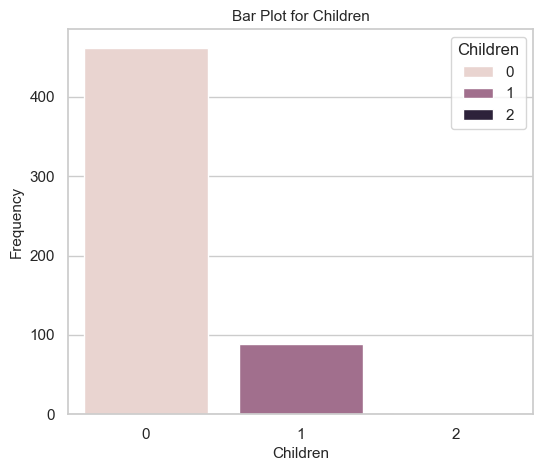

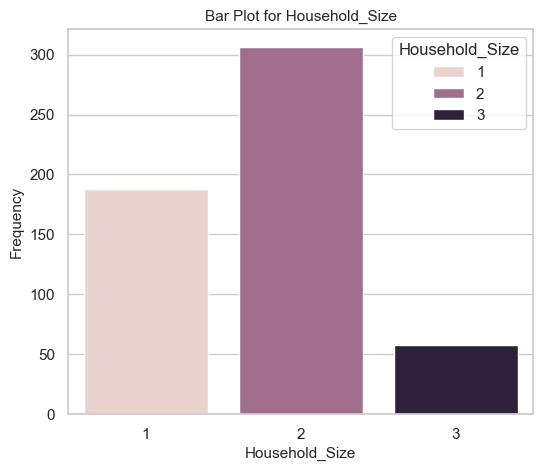

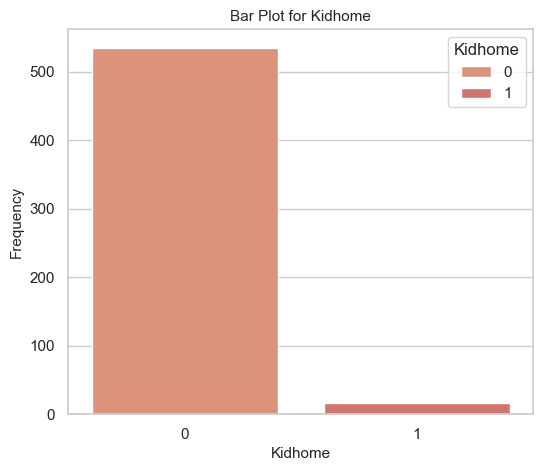

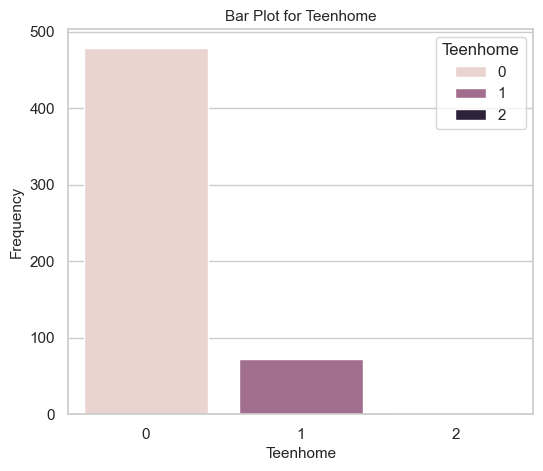

In [36]:
var = ["Children", "Household_Size", "Kidhome", "Teenhome"]
sns.set(style="whitegrid")
sns.set_palette("flare")

for var in var:
    plt.figure(figsize=(6, 5))
    sns.barplot(x=var, y="count", hue=var, data=cluster_3[var].value_counts().reset_index())
    plt.xlabel(var, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.tick_params(axis="x", labelsize=11)
    plt.tick_params(axis="y", labelsize=11)
    plt.title(f"Bar Plot for {var}", fontsize=11)
    plt.show()